# Digital Image Processing<br> Problem 4<br> Felix Neutatz

##Generating different noise and comparing different noise reduction methods

In [121]:
%matplotlib inline

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from functools import partial

In [123]:
def plotGreyImage(image, title):
    plt.imshow(image, cmap='Greys_r')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [124]:
def alpha_trimmed_mean_filter(A, d):
    m = A.shape[0]
    n = A.shape[1]
    
    sorted = np.sort(A, axis=None)
    
    deleted_d = sorted[(d/2) : (len(sorted) - (d/2))] # Delete (d/2) lowest and highest samples
    
    return np.sum(deleted_d) / ((m * n) - d)

In [125]:
def midpoint_filter(A):
    return 0.5 * (np.min(A) + np.max(A))

In [126]:
def min_filter(A):
    return np.min(A)

In [127]:
def max_filter(A):
    return np.max(A)

In [128]:
def median_filter(A):
    return np.median(A)

In [129]:
def contra_harmonic_mean_filter(A, Q):
    return np.sum(np.power(A, Q + 1)) / np.sum(np.power(A, Q)) #problem with dividing by zero!

In [173]:
def harmonic_mean_filter(A):
    m = A.shape[0]
    n = A.shape[1]
    
    #return (m * n) / np.sum(1.0 / A)  #problem with dividing by zero!
    
    A[A != 0] = 1.0 / A[A != 0]
    return (m * n) / np.sum(A)

In [131]:
def geometric_mean_filter(A):
    m = A.shape[0]
    n = A.shape[1]
    return np.power(np.prod(A), (1.0 / (m * n)))

In [132]:
def arithmetic_mean_filter(A):
    m = A.shape[0]
    n = A.shape[1]
    return np.sum(A) / (m * n)

In [164]:
def convolution(image, filter, filter_shape):
    newImage = np.zeros(image.shape)
    
    center = (filter_shape - 1) / 2
    
    #if a element of the window is outside of the border, fill it with zero = zero padding  
    #iterate through picture pixel by pixel
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            
            #compute current window A        
            A = np.zeros(filter_shape)
            for ax in range(filter_shape[0]):
                if (ax - center[0] + x >= 0 and ax - center[0] + x < image.shape[0]):
                    for ay in range(filter_shape[1]):
                        if (ay - center[1] + y >= 0 and ay - center[1] + y < image.shape[1]):
                            A[ax,ay] = image[ax - center[0] + x, ay - center[1] + y]
                            
            #apply filter to window of point at (x,y)
            newImage[x,y] = filter(A)
    
    return newImage

In [134]:
def draw_histogram(greyvalues, cdf, normed = False):
    valueRange = len(greyvalues)
    
    #plot histogram        
    fig, ax1 = plt.subplots()   
    
    if (normed):
        ax1.set_title("normed histogram")
    else:
        ax1.set_title("histogram")
    
    index = np.arange(valueRange)
    
    if (normed):
        ax1.bar(index, greyvalues  / float(np.sum(greyvalues)), 0.35, alpha=0.4, color='b')
    else:
        ax1.bar(index, greyvalues, 0.35, alpha=0.4, color='b')
    ax1.set_ylabel('count', color='b')
    ax1.set_xlabel('pixel intensities')
    ax1.set_xlim((0,valueRange))    
    for tl in ax1.get_yticklabels():
        tl.set_color('b')
        
    #plot cdf
    ax2 = ax1.twinx()    
    if (normed):
        ax2.plot(index, cdf / float(np.sum(greyvalues)), color = 'r') 
        ax2.set_ylim((0,1.1))
    else:
        ax2.plot(index, cdf, color = 'r')     
    ax2.set_ylabel('cdf', color = 'r')
    ax2.set_xlim((0,valueRange))
    for tl in ax2.get_yticklabels():
        tl.set_color('r')

    plt.show()    

In [135]:
#my implementation of histogram
def histogram(image):
    values = np.asmatrix(image,dtype=int).A1
        
    valueRange = np.max(values) + 1  
    index = np.arange(valueRange)
    
    greyvalues = np.asarray([0]*valueRange, dtype = float)
    
    for i in range(len(values)):
        greyvalues[values[i]] += 1
    
    #calculate CDF
    sum = 0.0
    cdf = np.asarray([0.0] * valueRange, dtype = float)
    for i in index:
        cdf[i] = sum + greyvalues[i]
        sum += greyvalues[i]
        
    return (greyvalues, cdf)

In [136]:
def draw_hist(img):
    greyvalues,cdf = histogram(img)
    draw_histogram(greyvalues, cdf, normed = False)

In [137]:
def gaussian_noise(mu, sigma, shape):
    gaussian_noise = np.random.normal(loc=mu, scale=sigma, size=shape)

    OldMin = np.min(gaussian_noise)
    OldMax = np.max(gaussian_noise)
    NewMin = 0
    NewMax = 255

    gaussian_noise_remapped = (((gaussian_noise - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMin
    
    return gaussian_noise_remapped

In [138]:
def uniform_noise(shape):
    uniform_noise = np.random.uniform(low=0, high=255, size=shape)
    
    return uniform_noise

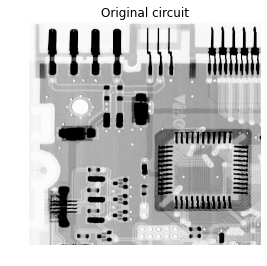

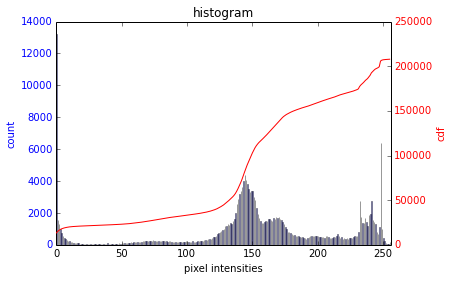

In [139]:
imageName = 'Circuit.tif'
circuit = mpimg.imread(imageName)

plotGreyImage(circuit, "Original circuit")

draw_hist(circuit)

### Gaussian noise

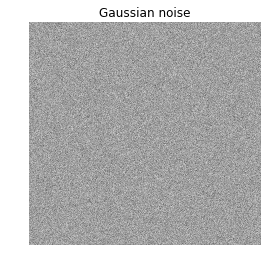

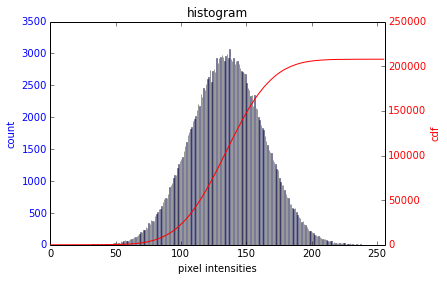

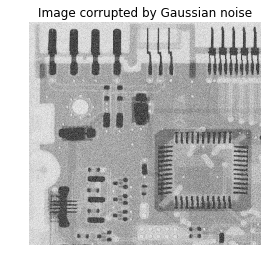

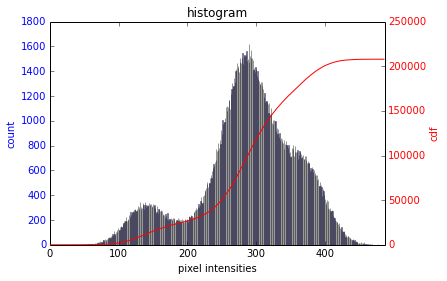

In [140]:
mu = 0.0 # mean
sigma = 0.1 # standard deviation

gaussian = gaussian_noise(mu, sigma, circuit.shape)
plotGreyImage(gaussian, "Gaussian noise")

draw_hist(gaussian)

circuit_gaussian = gaussian + circuit
plotGreyImage(circuit_gaussian, "Image corrupted by Gaussian noise")

draw_hist(circuit_gaussian)

### Applying mean filter on Gaussian corrupted image

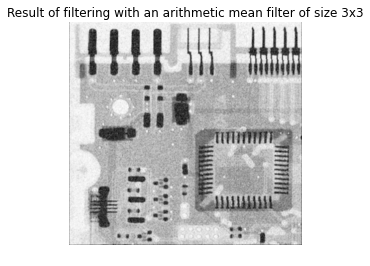

In [141]:
gaussian_arithmetic_mean = convolution(circuit_gaussian, partial(arithmetic_mean_filter), np.asarray([3,3]))
plotGreyImage(gaussian_arithmetic_mean, "Result of filtering with an arithmetic mean filter of size 3x3")

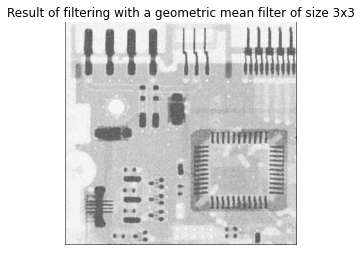

In [142]:
gaussian_geometric_mean = convolution(circuit_gaussian, partial(geometric_mean_filter), np.asarray([3,3]))
plotGreyImage(gaussian_geometric_mean, "Result of filtering with a geometric mean filter of size 3x3")

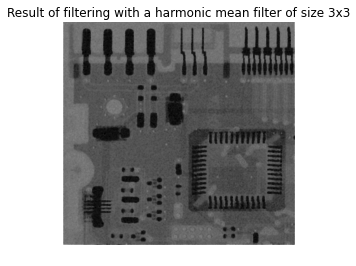

In [171]:
gaussian_harmonic_mean = convolution(circuit_gaussian, partial(harmonic_mean_filter), np.asarray([3,3]))
plotGreyImage(gaussian_harmonic_mean, "Result of filtering with a harmonic mean filter of size 3x3")

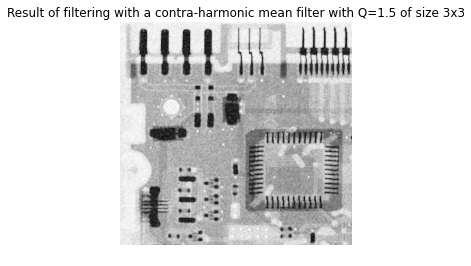

In [144]:
gaussian_contra_harmonic_mean = convolution(circuit_gaussian, partial(contra_harmonic_mean_filter, Q=1.5), np.asarray([3,3]))
plotGreyImage(gaussian_contra_harmonic_mean, "Result of filtering with a contra-harmonic mean filter with Q=1.5 of size 3x3")

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in power
  from IPython.kernel.zmq import kernelapp as app
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from IPython.kernel.zmq import kernelapp as app


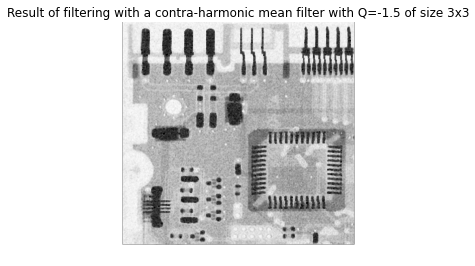

In [163]:
gaussian_contra_harmonic_mean = convolution(circuit_gaussian, partial(contra_harmonic_mean_filter, Q=-1.5), np.asarray([3,3]))
plotGreyImage(gaussian_contra_harmonic_mean, "Result of filtering with a contra-harmonic mean filter with Q=-1.5 of size 3x3")

### Applying order statistics on Gaussian corrupted image

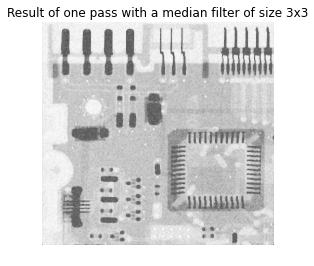

In [146]:
gaussian_median = convolution(circuit_gaussian, partial(median_filter), np.asarray([3,3]))
plotGreyImage(gaussian_median, "Result of one pass with a median filter of size 3x3")

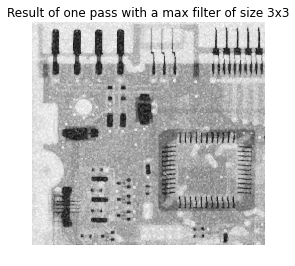

In [147]:
gaussian_max = convolution(circuit_gaussian, partial(max_filter), np.asarray([3,3]))
plotGreyImage(gaussian_max, "Result of one pass with a max filter of size 3x3")

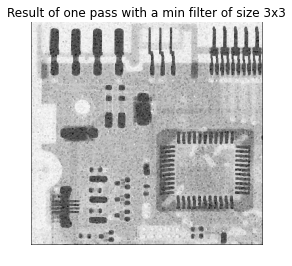

In [148]:
gaussian_min = convolution(circuit_gaussian, partial(min_filter), np.asarray([3,3]))
plotGreyImage(gaussian_min, "Result of one pass with a min filter of size 3x3")

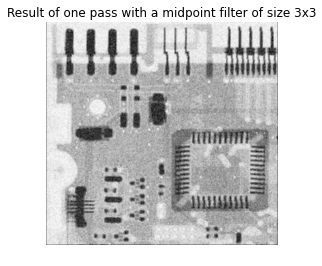

In [149]:
gaussian_midpoint = convolution(circuit_gaussian, partial(midpoint_filter), np.asarray([3,3]))
plotGreyImage(gaussian_midpoint, "Result of one pass with a midpoint filter of size 3x3")

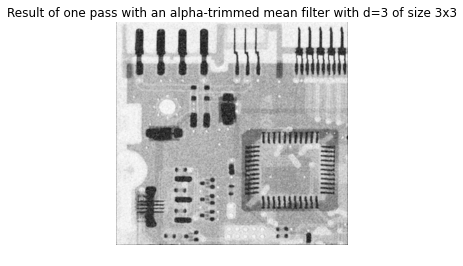

In [150]:
gaussian_alpha_trimmed_mean = convolution(circuit_gaussian, partial(alpha_trimmed_mean_filter, d=3), np.asarray([3,3]))
plotGreyImage(gaussian_alpha_trimmed_mean, "Result of one pass with an alpha-trimmed mean filter with d=3 of size 3x3")

###Uniform noise

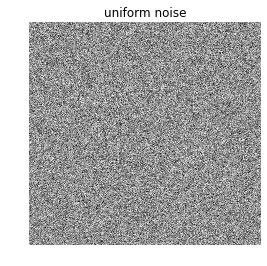

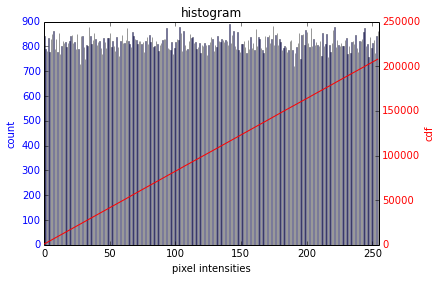

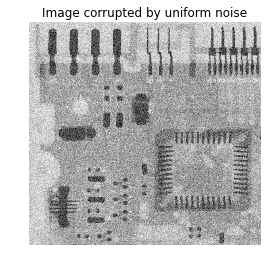

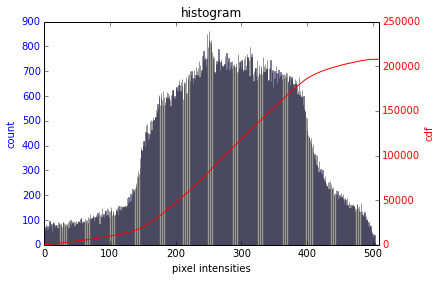

In [151]:
uniform = uniform_noise(circuit.shape)
plotGreyImage(uniform, "uniform noise")

draw_hist(uniform)

circuit_uniform = uniform + circuit
plotGreyImage(circuit_uniform, "Image corrupted by uniform noise")

draw_hist(circuit_uniform)


### Applying mean filter on uniform corrupted image

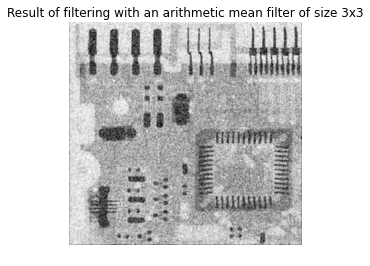

In [152]:
uniform_arithmetic_mean = convolution(circuit_uniform, partial(arithmetic_mean_3x3_filter), np.asarray([3,3]))
plotGreyImage(uniform_arithmetic_mean, "Result of filtering with an arithmetic mean filter of size 3x3")

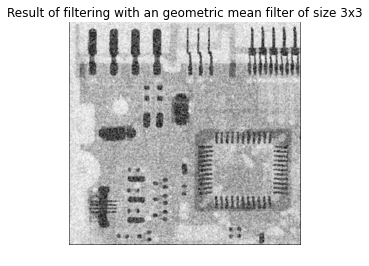

In [153]:
uniform_geometric_mean = convolution(circuit_uniform, partial(geometric_mean_3x3_filter), np.asarray([3,3]))
plotGreyImage(uniform_geometric_mean, "Result of filtering with an geometric mean filter of size 3x3")

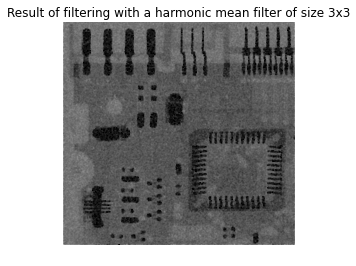

In [172]:
uniform_harmonic_mean = convolution(circuit_uniform, partial(harmonic_mean_filter), np.asarray([3,3]))
plotGreyImage(uniform_harmonic_mean, "Result of filtering with a harmonic mean filter of size 3x3")

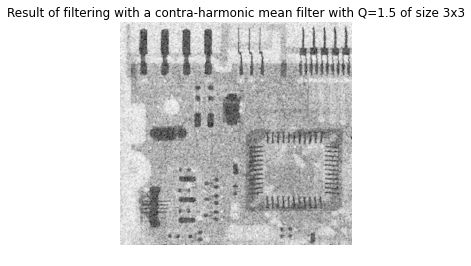

In [155]:
uniform_contra_harmonic_mean = convolution(circuit_uniform, partial(contra_harmonic_mean_filter, Q=1.5), np.asarray([3,3]))
plotGreyImage(uniform_contra_harmonic_mean, "Result of filtering with a contra-harmonic mean filter with Q=1.5 of size 3x3")

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in power
  from IPython.kernel.zmq import kernelapp as app
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from IPython.kernel.zmq import kernelapp as app


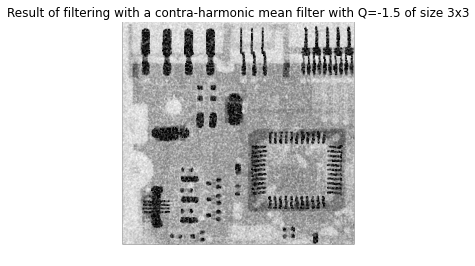

In [156]:
uniform_contra_harmonic_mean = convolution(circuit_uniform, partial(contra_harmonic_mean_filter, Q=-1.5), np.asarray([3,3]))
plotGreyImage(uniform_contra_harmonic_mean, "Result of filtering with a contra-harmonic mean filter with Q=-1.5 of size 3x3")

###Applying order statistics on uniform corrupted image

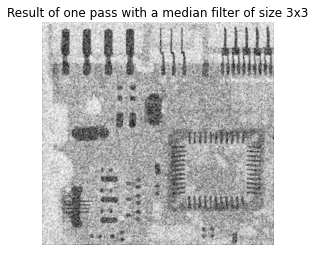

In [157]:
uniform_median = convolution(circuit_uniform, partial(median_filter), np.asarray([3,3]))
plotGreyImage(uniform_median, "Result of one pass with a median filter of size 3x3")

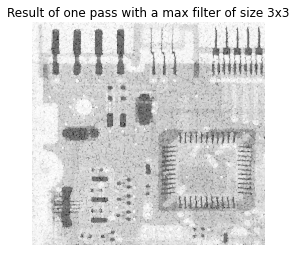

In [158]:
uniform_max = convolution(circuit_uniform, partial(max_filter), np.asarray([3,3]))
plotGreyImage(uniform_max, "Result of one pass with a max filter of size 3x3")

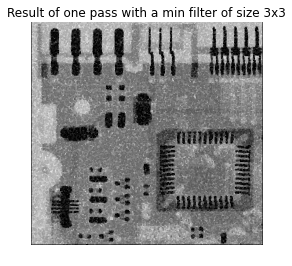

In [159]:
uniform_min = convolution(circuit_uniform, partial(min_filter), np.asarray([3,3]))
plotGreyImage(uniform_min, "Result of one pass with a min filter of size 3x3")

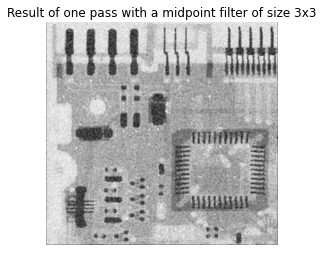

In [160]:
uniform_midpoint = convolution(circuit_uniform, partial(midpoint_filter), np.asarray([3,3]))
plotGreyImage(uniform_midpoint, "Result of one pass with a midpoint filter of size 3x3")

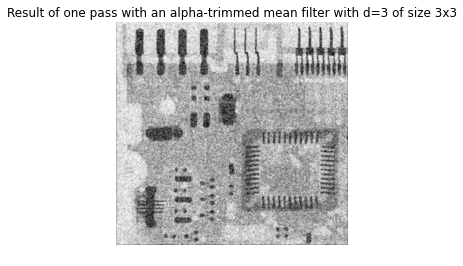

In [161]:
uniform_alpha_trimmed_mean = convolution(circuit_uniform, partial(alpha_trimmed_mean_filter, d=3), np.asarray([3,3]))
plotGreyImage(uniform_alpha_trimmed_mean, "Result of one pass with an alpha-trimmed mean filter with d=3 of size 3x3")